In [2421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean
from scipy.stats import chi2

##### Loading Data

In [2422]:
book = pd.read_excel("project_dataset.xlsx", header =None)  

In [2423]:
book.head()

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0,-12,-17,-22,-19,-16,-16,-16,-17,-16,...,-22,-22,-17,-25,-32,-28,-30,-30,-25,-19
1,0,-9,-14,-12,-17,-20,-17,-22,-17,-16,...,-30,-22,-25,-25,-27,-32,-33,-28,-22,-16
2,1,-9,-12,-17,-16,-16,-14,-16,-16,-17,...,-25,-30,-28,-24,-17,-22,-30,-32,-33,-28
3,-1,-12,-17,-16,-14,-17,-16,-17,-19,-16,...,-20,-24,-20,-20,-24,-28,-30,-32,-33,-25
4,0,-8,-11,-11,-12,-16,-17,-17,-12,-12,...,-20,-24,-25,-22,-27,-27,-25,-22,-20,-14


In [2424]:
m,p = book.shape
print(m,p)

552 209


In [2425]:
X= np.array(book)

#### SCREE PLOT

In [2427]:
mean = np.mean(X,axis = 0)

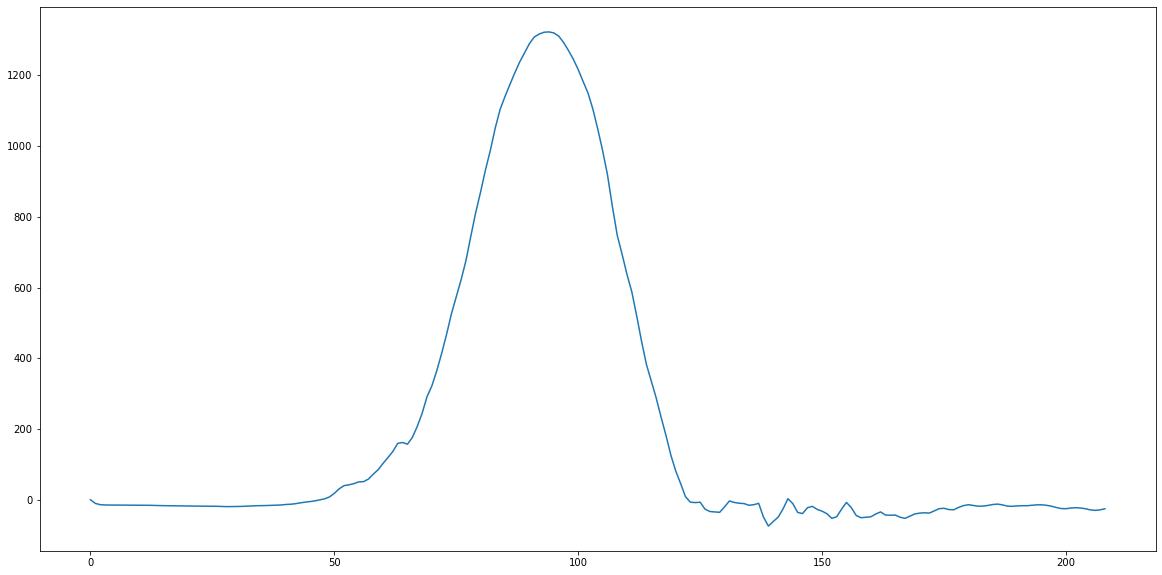

In [2428]:
plt.plot(mean)

In [2429]:
S =np.cov(X,rowvar=False)

In [2430]:
S

array([[ 1.66416463,  0.48159144,  0.53282898, ...,  0.07705687,
        -0.13735895, -0.04481641],
       [ 0.48159144,  4.25021371,  2.6649011 , ...,  0.94683908,
        -0.09060601, -0.87668337],
       [ 0.53282898,  2.6649011 ,  6.15126318, ...,  1.15615547,
         0.37368816, -0.58798561],
       ...,
       [ 0.07705687,  0.94683908,  1.15615547, ..., 19.93473987,
        16.08393829,  7.6035239 ],
       [-0.13735895, -0.09060601,  0.37368816, ..., 16.08393829,
        30.2637497 , 22.55533418],
       [-0.04481641, -0.87668337, -0.58798561, ...,  7.6035239 ,
        22.55533418, 34.08285002]])

In [2431]:
eigvals = np.linalg.eig(S)

In [2432]:
a=[]
for i in eigvals[0]:
    a.append(i/np.sum(eigvals[0]))

In [2433]:
plt.rcParams["figure.figsize"] = (20,10)

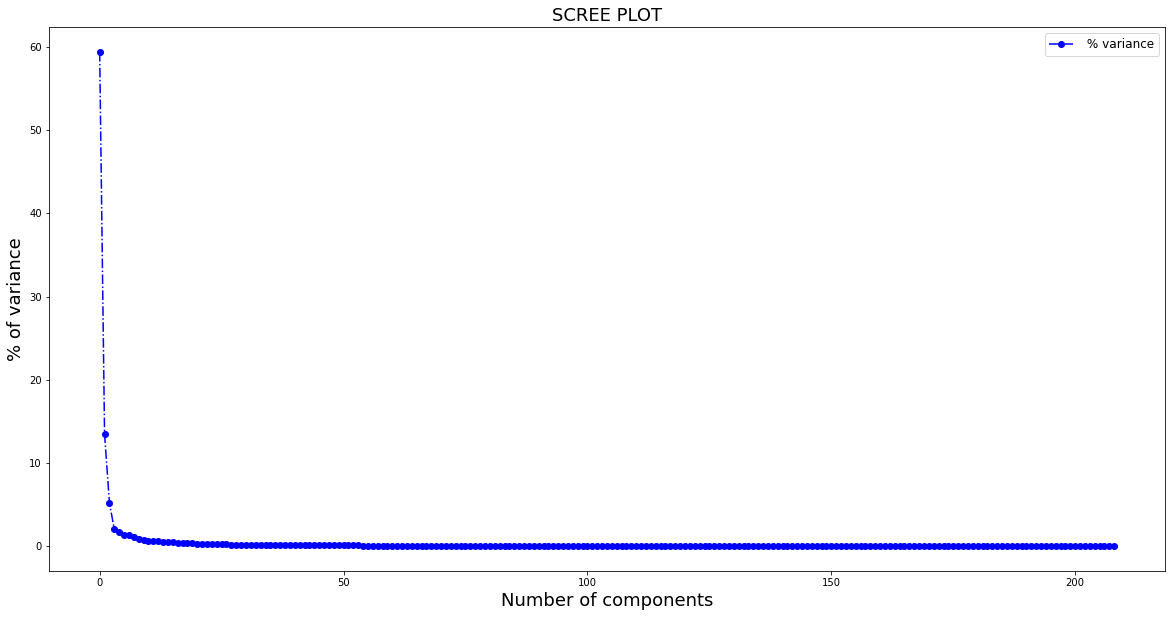

In [2434]:
A=np.asarray(a)*100
plt.plot(A,'-o',color='b',label=' % variance',linestyle='-.')
plt.title('SCREE PLOT',fontsize=18)
plt.xlabel('Number of components',fontsize=18)
plt.ylabel('% of variance',fontsize=18)
plt.legend(fontsize=12,loc = 'upper right')

In [2435]:
a[3]

C:\Users\ishan\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.02000022504853903

In [2436]:
a[0]+a[1]+a[2]+a[3]

0.8010612001703104

###### The above figure basically shows that by including 4 components we are able to explain about 80% variability in the data.

#### Pareto Plot

Text(0, 50, '4th Principal component-80%')

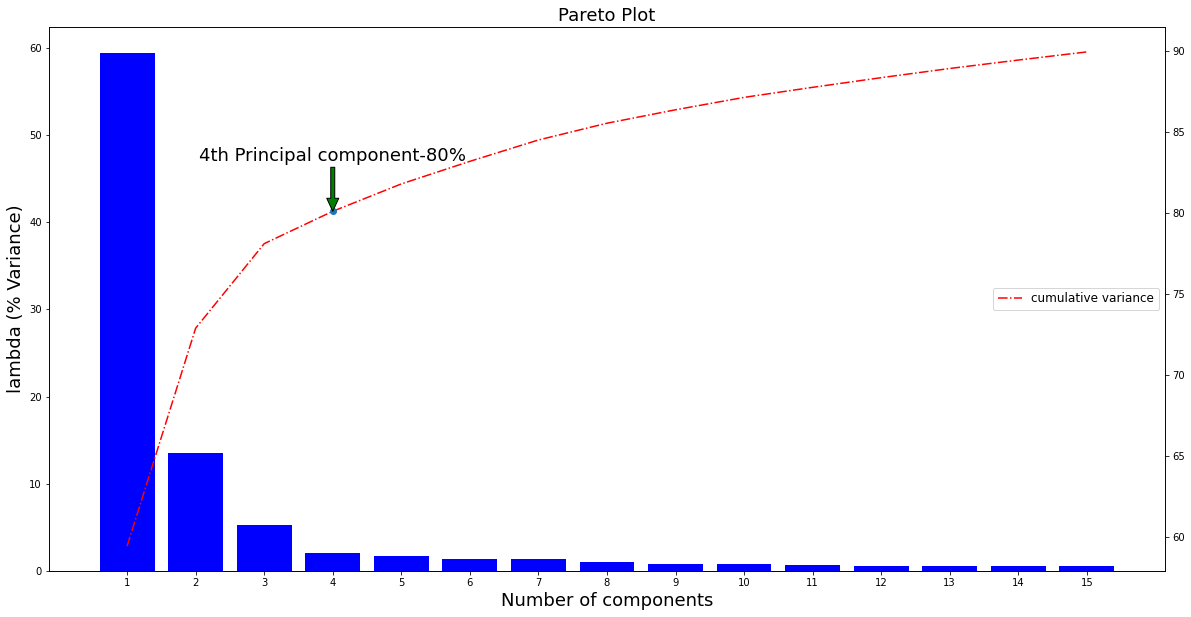

In [2437]:
vara=np.array(a)
vara=vara*100
f=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
x_pca=vara[0:15]
fig, ax1 = plt.subplots()
ax1.bar(f,x_pca,color='b')
ax1.set_xlabel('Number of components',fontsize=18)
ax1.set_ylabel('lambda (% Variance)',fontsize=18)
plt.title('Pareto Plot',fontsize=18)
ax2 = ax1.twinx()
pca_t=[]
tp=0
for i in x_pca:
    tp+=i
    pca_t.append(tp)

ax2.plot(pca_t,color='r',label='cumulative variance',linestyle='-.')
plt.plot(3,pca_t[3],'-o')
plt.legend(fontsize=12,loc = 'center right')

ax2.annotate('4th Principal component-80%',(3,pca_t[3]),textcoords="offset pixels",xytext=(0,50),arrowprops=dict(headlength= 13,facecolor='g',shrink=10),ha='center',fontsize=18)

##### Same thing is shown by the Pareto Plot as well!!

In [2438]:
listp=[i for i in range(p)]
listl=listp[::-1]

In [2439]:
np.mean(listl[:p-3])

105.5

In [2440]:
t=[1,2,3]
t[::-1]

[3, 2, 1]

In [2441]:
n=m
MDL=[]
for i in range(1,p+1):
    al=np.mean(eigvals[0][i-1:])
    gl=gmean(eigvals[0][i-1:])
    MDL_calc=n*(p-i)*np.log(al/gl)+i*(2*p-i)*(np.log(n)/2)
    MDL.append(MDL_calc)

In [2442]:
MDL

[310986.62315307447,
 212450.8356393391,
 170773.20743016954,
 150421.70234711788,
 143082.0624897049,
 136522.42980078005,
 130963.32009347464,
 125226.72926697458,
 120825.74254818824,
 117471.4926275177,
 114267.65283408057,
 111910.28695348446,
 109528.98701691307,
 107180.63485867872,
 105000.58802887544,
 102780.60773116769,
 100846.85851328105,
 99253.60186452925,
 97855.38939180181,
 96433.46815462442,
 95232.89167113247,
 94337.96863457278,
 93484.61043689883,
 92675.99497317799,
 91967.28897917709,
 91354.56901165236,
 90740.86720511192,
 90244.34730627178,
 89926.51748173797,
 89680.0803514097,
 89489.16330079015,
 89326.25712171574,
 89133.31487171413,
 89039.62138157856,
 88972.03730542309,
 88959.4938504578,
 88959.78326767185,
 89052.82306042228,
 89162.93298579747,
 89275.59510309715,
 89445.13505776881,
 89623.68466907638,
 89829.74648607335,
 90046.24311967929,
 90255.93370953726,
 90456.27935652556,
 90666.98258522381,
 90880.13321965479,
 91090.46333063352,
 91325.1

In [2443]:
len(MDL)

209

In [2444]:
len(listp)

209

Text(0, 50, 'Lowest MDL Value')

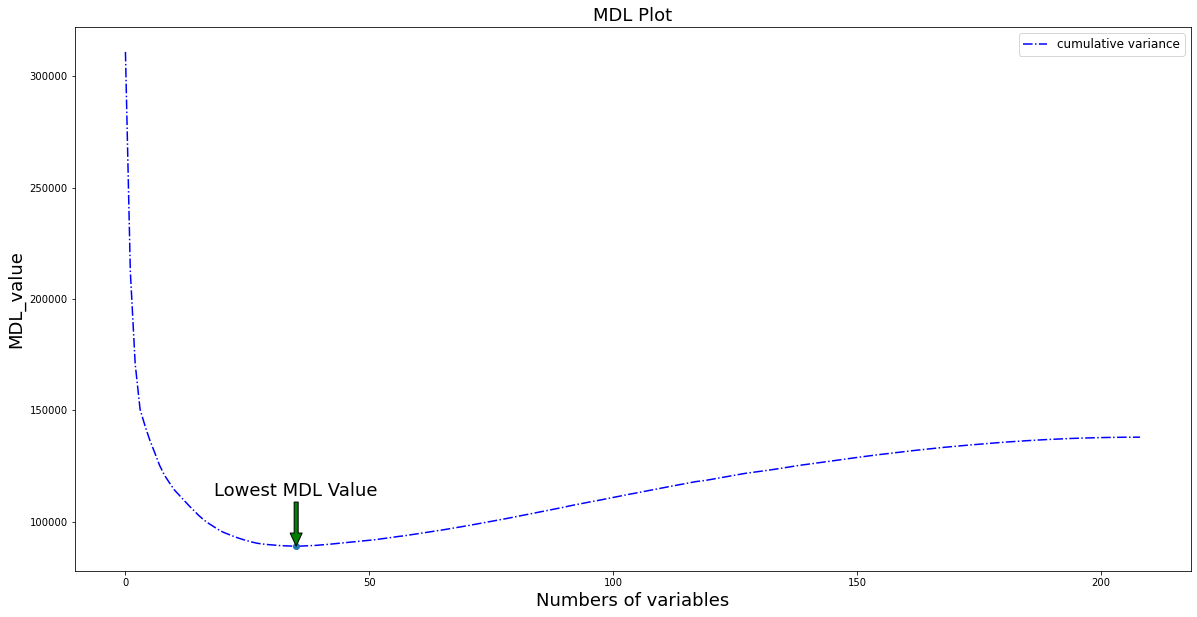

In [2445]:
plt.plot(MDL,color='b',label='cumulative variance',linestyle='-.')
plt.plot(35,MDL[34],'-o')
plt.xlabel('Numbers of variables',fontsize=18)
plt.ylabel('MDL_value',fontsize=18)
plt.title('MDL Plot',fontsize=18)
plt.legend(fontsize=12,loc = 'upper right')
plt.annotate('Lowest MDL Value',(35,MDL[34]),textcoords="offset pixels",xytext=(0,50),arrowprops=dict(headlength= 13,facecolor='g',shrink=10),ha='center',fontsize=18)

In [2446]:
d={}
for i, v in enumerate(MDL):
    d[i]=v
    

In [2447]:
best_key = min(d, key=d.get)

In [2448]:
best_key

35

In [2449]:
# calculating Y

In [2450]:
e=eigvals[1][:,:4]

In [2451]:
Y=X.dot(e)

In [2452]:
Y.shape

(552, 4)

In [2453]:
Y

array([[-6443.79671979,  -361.18921789,  -686.23871242,   123.84466172],
       [-6518.21338872,  -390.53419629,  -671.25831238,   101.79861366],
       [-6523.55083411,  -331.00220939,  -691.66143689,   106.37442506],
       ...,
       [-6450.60374432,  -259.57351091,  -690.06584599,    88.26255052],
       [-6349.72155057,  -214.83406132,  -689.45913914,    97.95872982],
       [-6386.26888554,  -212.15873456,  -690.56684841,    89.11237699]])

In [2593]:

S =np.cov(Y,rowvar=False)
S

array([[ 1.36995923e+04,  6.76096243e-12,  6.06109718e-12,
         3.79066167e-12],
       [ 6.76096243e-12,  3.10545661e+03, -2.25805581e-12,
         3.69740133e-13],
       [ 6.06109718e-12, -2.25805581e-12,  1.20472542e+03,
        -6.47045232e-13],
       [ 3.79066167e-12,  3.69740133e-13, -6.47045232e-13,
         4.61166992e+02]])

In [2454]:
type(Y)

numpy.ndarray

In [2628]:
1/(0.0027)

370.3703703703703

In [2455]:
# Calculating UCL

In [2456]:
alpha=0.0027
UCL=chi2.ppf(1-alpha, 4)
UCL

16.251171152210564

In [2626]:
alpha2=2.3936048e-05
UCL2=chi2.ppf(1-alpha2, 4)
UCL2

26.600826793045144

In [2457]:
# CALCULATING T^2

In [2458]:
Y_bar = np.mean(Y,axis=0)
Y_bar

array([-6481.86868346,  -224.15046298,  -652.46962958,   103.95169222])

In [2459]:
T_2=[]
S_2=np.cov(Y,rowvar=False)
S_inv=np.linalg.inv(S_2)
for i in range(m):
    x_diff=Y[i]-Y_bar
    x_diff=np.reshape(x_diff,(4,1))
    x_diff_t = x_diff.transpose()
    temp=x_diff_t.dot(S_inv)
    T_2.append(temp.dot(x_diff))

In [2460]:
T_2_new=[]
for i in range(len(T_2)):
    T_2_new.append((T_2[i][0][0]))

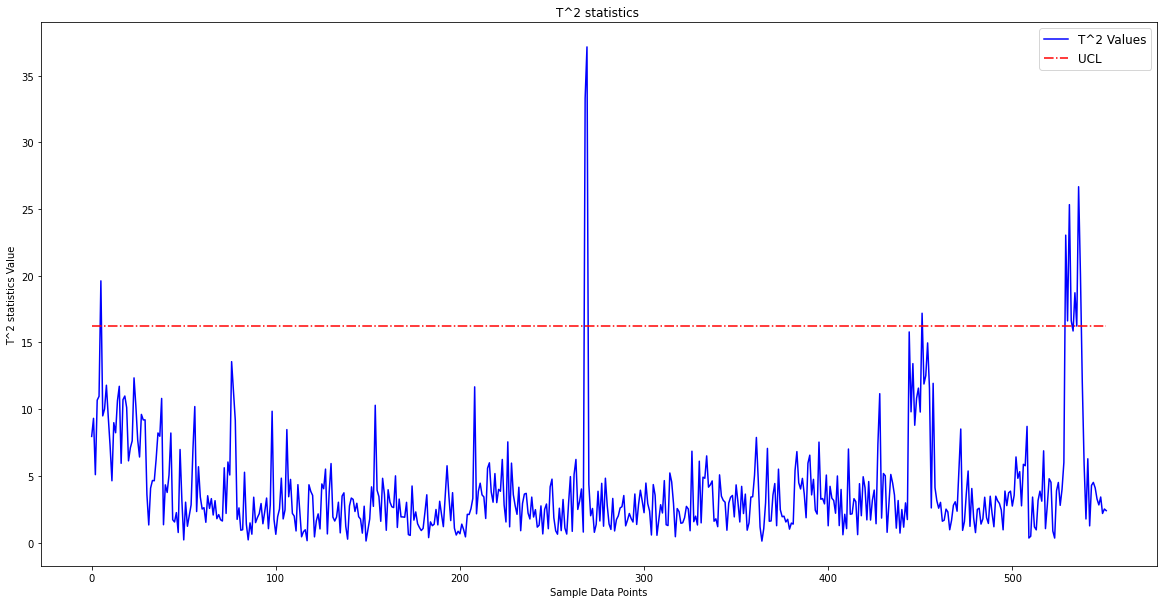

In [2461]:
plt.plot(T_2_new,color='b',label='T^2 Values')
plt.legend(fontsize=12,loc = 'upper right')
plt.title("T^2 statistics ")
plt.xlabel('Sample Data Points')
plt.ylabel('T^2 statistics Value')
ucl_ar = UCL
Ucl_limit=np.repeat(UCL,len(T_2_new))
plt.plot(Ucl_limit,'r-.',label='UCL')
plt.legend(fontsize=12,loc = 'upper right')

In [2462]:
x=np.array(T_2_new)
for i in x:
    if i>UCL:
        print("True")

True
True
True
True
True
True
True
True
True
True
True


In [2463]:
t=[i for i, v in enumerate(x) if v> UCL]
t

[5, 268, 269, 451, 529, 530, 531, 532, 534, 536, 537]

In [2464]:
def array_reduce(X,t):
    #print(np.delete(X,t,0))
    return np.asarray(np.delete(X,t,0))

In [2465]:
def T_2_calc(X,m):
    T_2_try=[]
    S_2=np.cov(X,rowvar=False)
    #print(S_2)
    S_inv=np.linalg.inv(S_2)
    X_bar = np.mean(X,axis=0)
    for i in range(len(X)):
        x_diff=X[i]-X_bar
        x_diff=np.reshape(x_diff,(4,1))
        x_diff_t = x_diff.transpose()
        temp=x_diff_t.dot(S_inv)
        T_2_try.append(temp.dot(x_diff))
    return T_2_try

In [2466]:
def plot_try(t_stat,UCL):
    plt.plot(t_stat)
    plt.plot(t_stat,color='b',label='T^2 Values')
    plt.legend(fontsize=12,loc = 'upper right')
    plt.title("T^2 statistics ")
    plt.xlabel('Sample Data Points')
    plt.ylabel('T^2 statistics Value')
    ucl_ar = UCL
    Ucl_limit=np.repeat(UCL,len(T_2_new))
    plt.plot(Ucl_limit,'r-.',label='UCL')
    plt.legend(fontsize=12,loc = 'upper right')

In [2467]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2468]:
%matplotlib inline

In [2469]:
# run=False
# X=Y
# x=np.array(T_2_new)
# for j in x:
#     if j>UCL:
#         run = True
#         print(j)  
#     if run == True:
#         t=[i for i, v in enumerate(x) if v> UCL]
#         X=array_reduce(X,t)
#         mt,pt = X.shape
#         xp=T_2_calc(X,mt)
#         xp2=[]
#         for i in range(len(xp)):
#             xp2.append((xp[i][0][0]))
#         plt.figure()
#         plot_try(xp2,UCL)
#         plt.pause(1)
#         print(f"len: {len(xp2)}")
#         x=xp2
#         run=False

In [2470]:
x=np.array(T_2_new)
x[x>UCL]

array([19.61877018, 33.30042724, 37.15429091, 17.19255282, 23.04544652,
       16.61613084, 25.33206081, 16.62531204, 18.72544568, 26.67486112,
       20.10809776])

In [2471]:
x1=np.array(np.repeat(UCL+ np.random.randint(1,10),len(Y)))

In [2472]:
plt.rcParams["figure.figsize"] = (20,10)

552


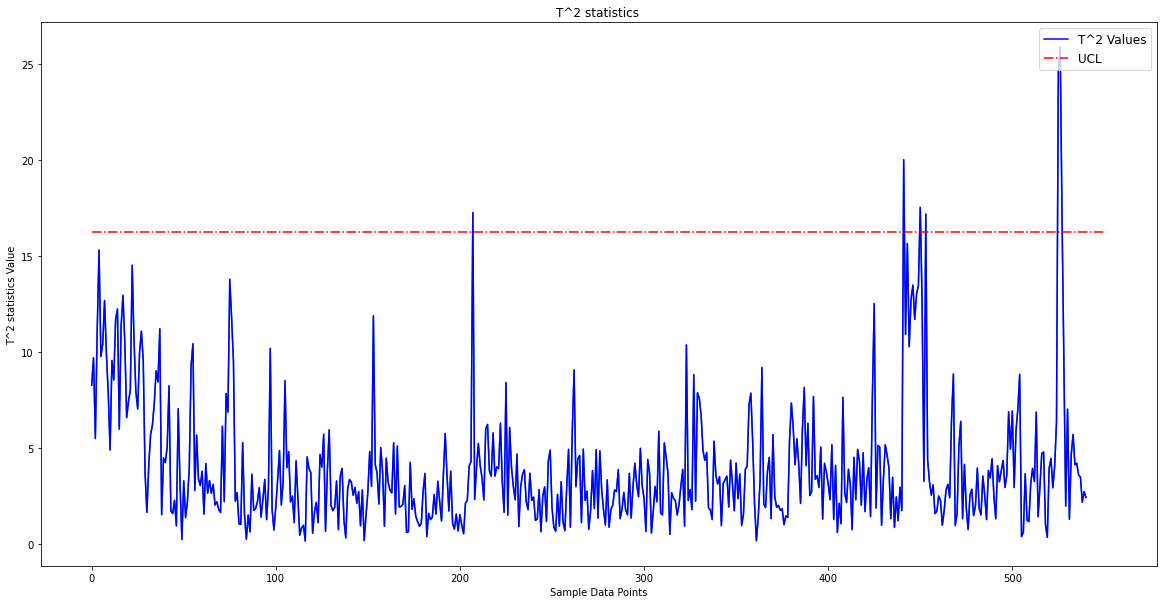

541
541


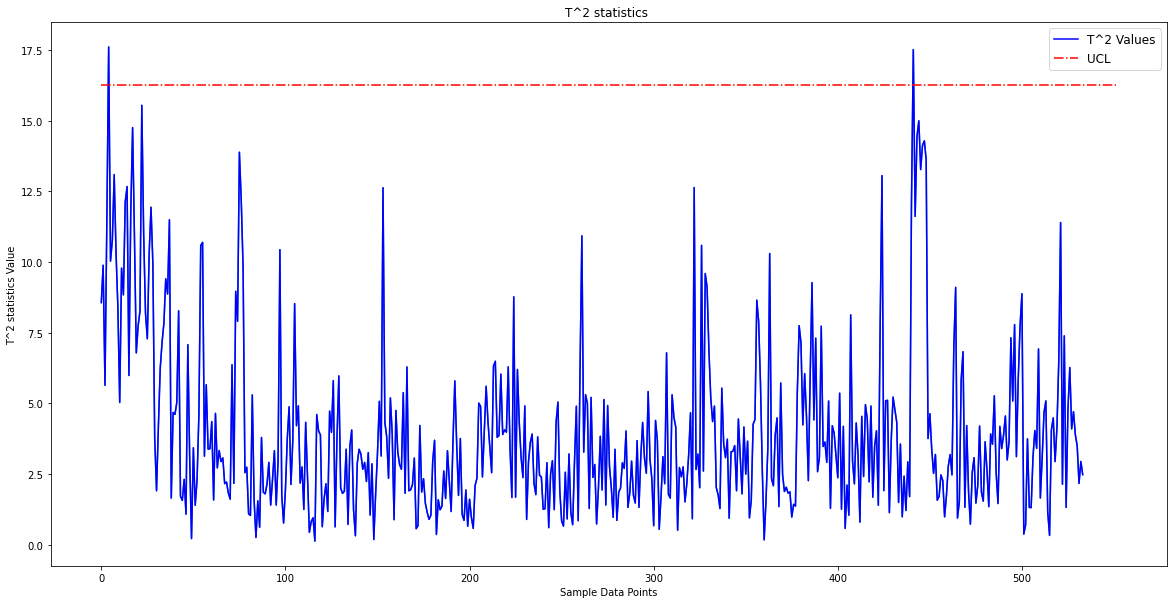

534
534


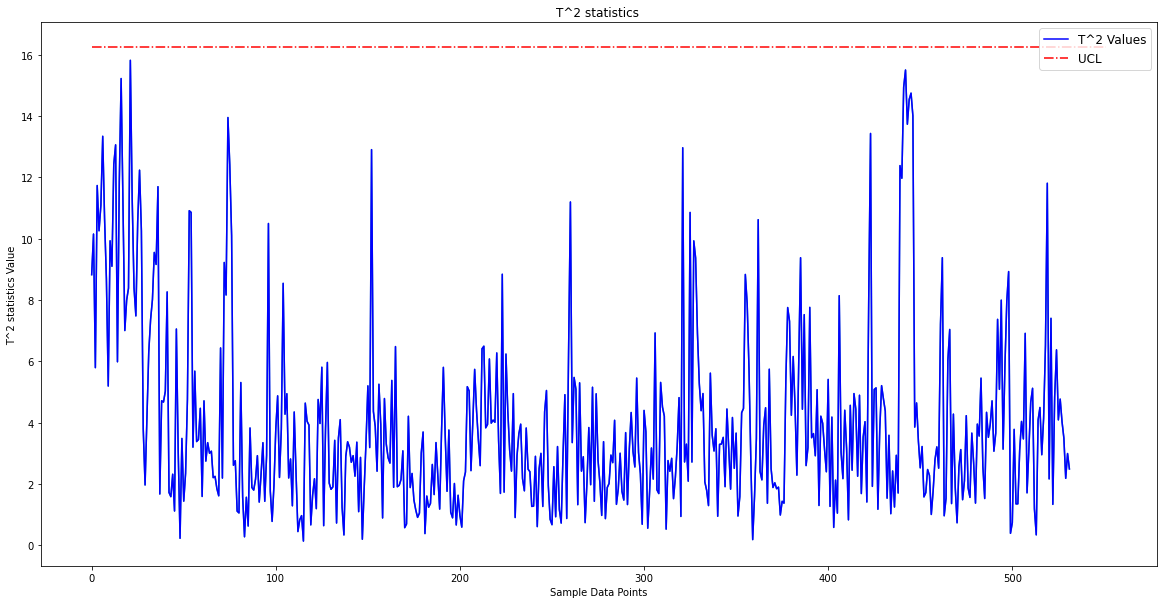

532


In [2473]:
X=Y
x1=np.array(T_2_new)
#print("hi")
t_track=[]
while any(x > UCL for x in x1):
    print(len(x1))
    t=[i for i, v in enumerate(x1) if v> UCL]
    #for ele in t:
    #    t_track.append(ele)
    t_track.append(t)
    X=array_reduce(X,t)
    mt,pt = X.shape
    xp=T_2_calc(X,mt)
    xp2=[]
    for i in range(len(xp)):
        xp2.append((xp[i][0][0]))
    plt.figure()
    plot_try(xp2,UCL)
    plt.pause(1)
    print(len(xp2))
    x1=np.array(xp2)
    #print(x1[x1>UCL])

In [2474]:
t_track

[[5, 268, 269, 451, 529, 530, 531, 532, 534, 536, 537],
 [207, 441, 450, 453, 525, 526, 527],
 [4, 441]]

### CUSUM

In [2517]:
## UCL
alpha=0.0027
UCL=chi2.ppf(1-alpha, 4)
UCL

16.251171152210564

In [2518]:
y_cusum= Y
for i in t_track:
    y_cusum = array_reduce(y_cusum,i)

In [2519]:
y_cusum.shape

(532, 4)

In [2520]:
# Needs to finds how to decide r
# shifted mean nreeds tp be decided = 
# current mean
mean_cusum = np.mean(y_cusum,axis = 0)
mean_cusum

array([-6473.07125726,  -222.57291661,  -651.57030983,   103.61494052])

In [2521]:
S_cu=np.cov(y_cusum,rowvar=False)
S_cu_inv=np.linalg.inv(S_cu)

In [2522]:
#randomly
k=1.5
#print(c[i])

In [2523]:
def c_calculate(i,j):
    mean_cusum_arr = y_cusum-[mean_cusum]*532
    c=np.array([0]*4)
    for p in range(j-1,i):
        c=c+(mean_cusum_arr[p])
    return c
        
    

In [2524]:
MC2=[0]*533
N=[1]*533
c=np.zeros([532, 4])
m_c,p_c = y_cusum.shape

for i in range(1,m_c+1):
    if i==1:
        N[i]=1
    else:
        if MC2[i-1] > 0:
            N[i]=N[i-1]+1
        else:
            N[i]=1
    j=i-N[i]+1
    cp=c_calculate(i,j)
    calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
    MC2[i]= max(0,calc-k*N[i])

In [2525]:
#UCL_cusum = 0.5932*4 + 3.6275
UCL_cusum=0.684211*4+4.162281
UCL_cusum

6.899125

In [2526]:
plt.rcParams["figure.figsize"] = (20,10)

In [2527]:
def plot_try_cusum(t_stat,UCL):
    plt.plot(t_stat)
    plt.plot(t_stat,color='b',label='CUSUM Values')
    plt.legend(fontsize=12,loc = 'upper right')
    plt.title("CUSUM statistics ")
    plt.xlabel('Sample Data Points')
    plt.ylabel('CUSUM statistics Value')
    ucl_ar = UCL
    Ucl_limit=np.repeat(UCL,len(t_stat))
    plt.plot(Ucl_limit,'r-.',label='UCL')
    plt.legend(fontsize=12,loc = 'upper right')

##### cusum 1 removed 61 points after this

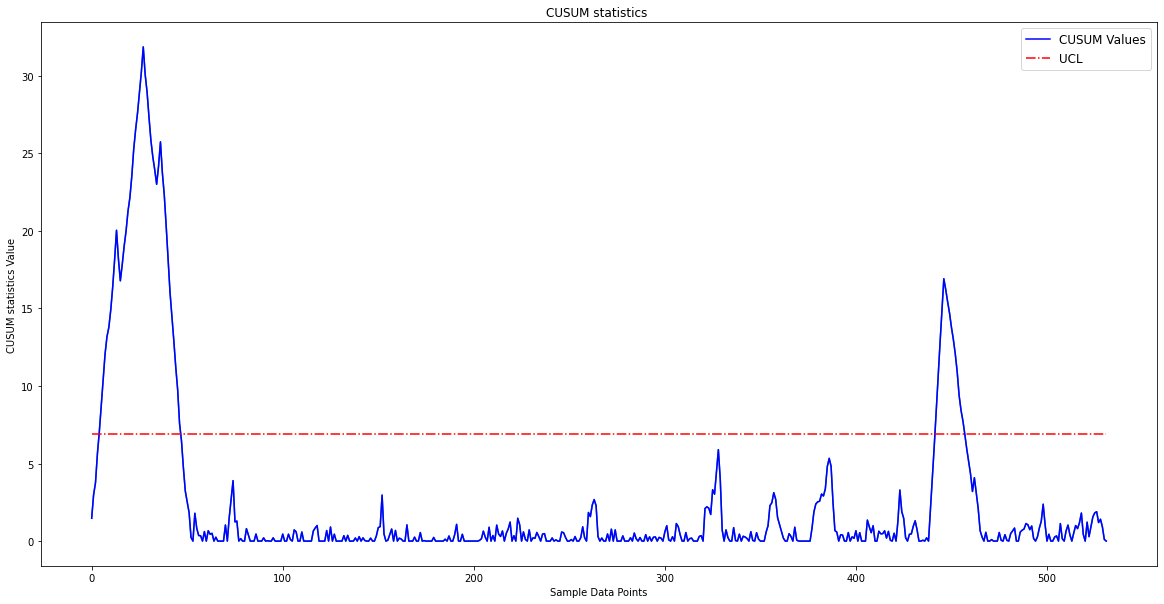

In [2528]:
plot_try_cusum(MC2[1:],UCL_cusum)

In [2529]:
MC=MC2[1:]
MC=np.array(MC)
t=[i for i, v in enumerate(MC) if v> UCL_cusum]

In [2530]:
print(len(t))

58


In [2531]:
# Tried 2nd itteration

In [2532]:
X=array_reduce(y_cusum,t)
len(X)
#len(y_cusum)

474

In [2533]:
X=array_reduce(y_cusum,t)
mean_cusum2 = np.mean(X,axis = 0)
S_cu=np.cov(X,rowvar=False)
S_cu_inv=np.linalg.inv(S_cu)
def c_calculate_try(i,j):
    mean_cusum_arr = X-[mean_cusum2]*len(X)
    c=np.array([0]*4)
    for p in range(j-1,i):
        c=c+(mean_cusum_arr[p])
    return c


In [2534]:
m_c,p_c = X.shape
MC3=[0]*(m_c+1)
N=[1]*(m_c+1)
c=np.zeros([m_c, 4])


for i in range(1,m_c+1):
    if i==1:
        N[i]=1
    else:
        if MC3[i-1] > 0:
            N[i]=N[i-1]+1
        else:
            N[i]=1
    j=i-N[i]+1
    cp=c_calculate_try(i,j)
    calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
    MC3[i]= max(0,calc-k*N[i])

###### CUSUM 2 REMOVED 19 POINTS AFTER THIS

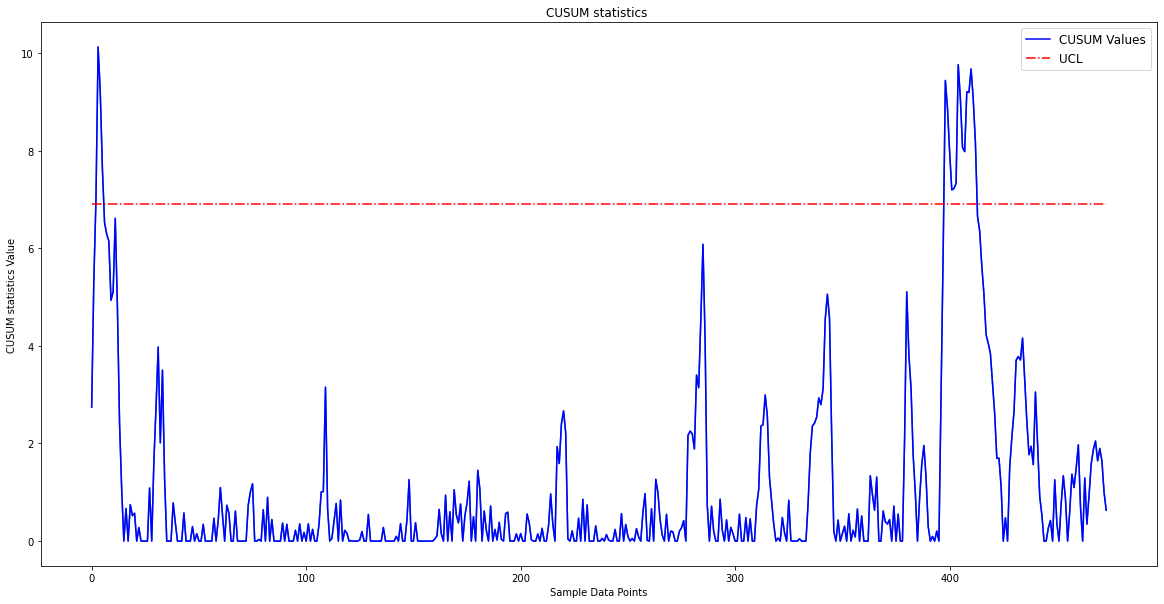

In [2535]:
#plt.plot(MC3[1:])
#Ucl_limit=np.repeat(UCL_cusum,len(MC3[1:]))
#plt.plot(Ucl_limit)
plot_try_cusum(MC3[1:],UCL_cusum)

In [2536]:
len(MC3)

475

In [2537]:
len(X)

474

In [2538]:
################# Finished 2nd itteration ###################

In [2539]:
######################## Individual 3rd try ###########################

In [2540]:
MC=MC3[1:]
MC=np.array(MC)
t=[i for i, v in enumerate(MC) if v> UCL_cusum]
print(len(t))

19


In [2541]:
X=array_reduce(X,t)
len(X)
#len(y_cusum)

455

In [2542]:
X_TRY=X

In [2543]:
len(X_TRY)

455

In [2544]:
def c_calculate_2(X,i,j):
    mean_cusum = np.mean(X,axis = 0)
    mean_cusum_arr = X-[mean_cusum]*len(X)
    c=np.array([0]*4)
    for p in range(j-1,i):
        c=c+(mean_cusum_arr[p])
    return c

In [2545]:
m_c,p_c = X_TRY.shape
MC4=[0]*(m_c+1)
N=[1]*(m_c+1)
print(m_c)
cp=np.zeros([m_c, 4])


for i in range(1,m_c+1):
    if i==1:
        N[i]=1
    else:
        if MC4[i-1] > 0:
            N[i]=N[i-1]+1
        else:
            N[i]=1
    j=i-N[i]+1
    cp=c_calculate_2(X_TRY,i,j)
    S_cu=np.cov(X_TRY,rowvar=False)
    S_cu_inv=np.linalg.inv(S_cu)
    calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
    MC4[i]= max(0,calc-k*N[i])

455


In [2546]:
print(len(MC4))

456


##### cusum plot after removing all points

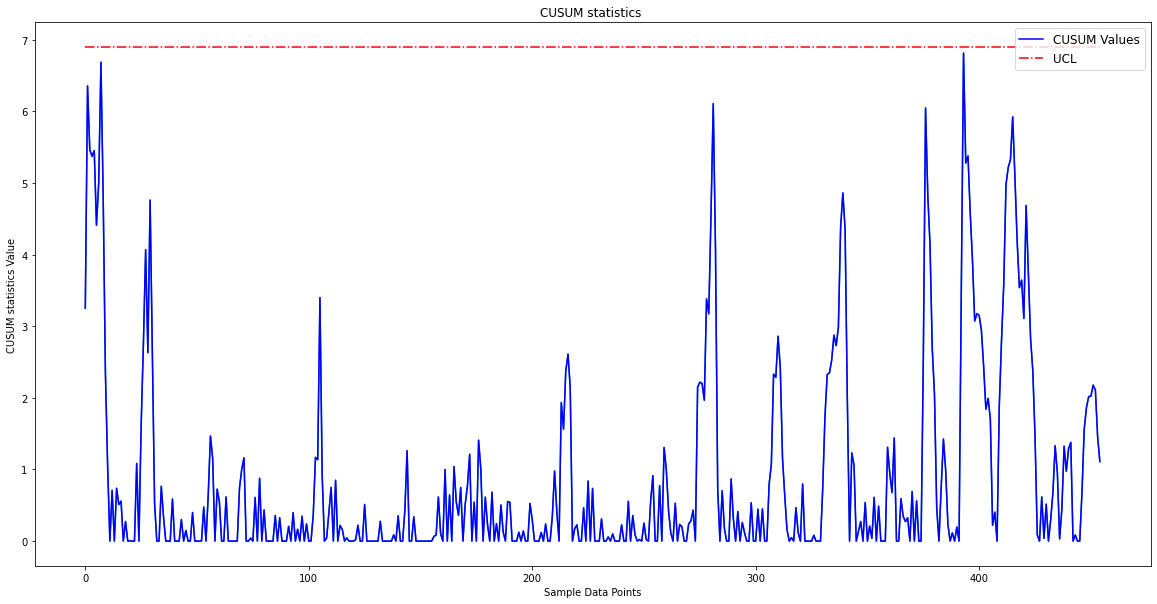

In [2547]:
#plt.plot(MC4[1:])
#Ucl_limit=np.repeat(UCL_cusum,len(MC4[1:]))
#plt.plot(Ucl_limit)
plot_try_cusum(MC4[1:],UCL_cusum)

In [2548]:
MC=MC4[1:]
MC=np.array(MC)
t=[i for i, v in enumerate(MC) if v> UCL_cusum]
print(len(t))

0


In [2549]:
X2=array_reduce(X_TRY,t)
len(X2)

455

In [2550]:
m_c,p_c = X2.shape
MC5=[0]*(m_c+1)
N=[1]*(m_c+1)
print(m_c)
cp=np.zeros([m_c, 4])


for i in range(1,m_c+1):
    if i==1:
        N[i]=1
    else:
        if MC5[i-1] > 0:
            N[i]=N[i-1]+1
        else:
            N[i]=1
    j=i-N[i]+1
    cp=c_calculate_2(X2,i,j)
    S_cu=np.cov(X2,rowvar=False)
    S_cu_inv=np.linalg.inv(S_cu)
    calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
    MC5[i]= max(0,calc-k*N[i])

455


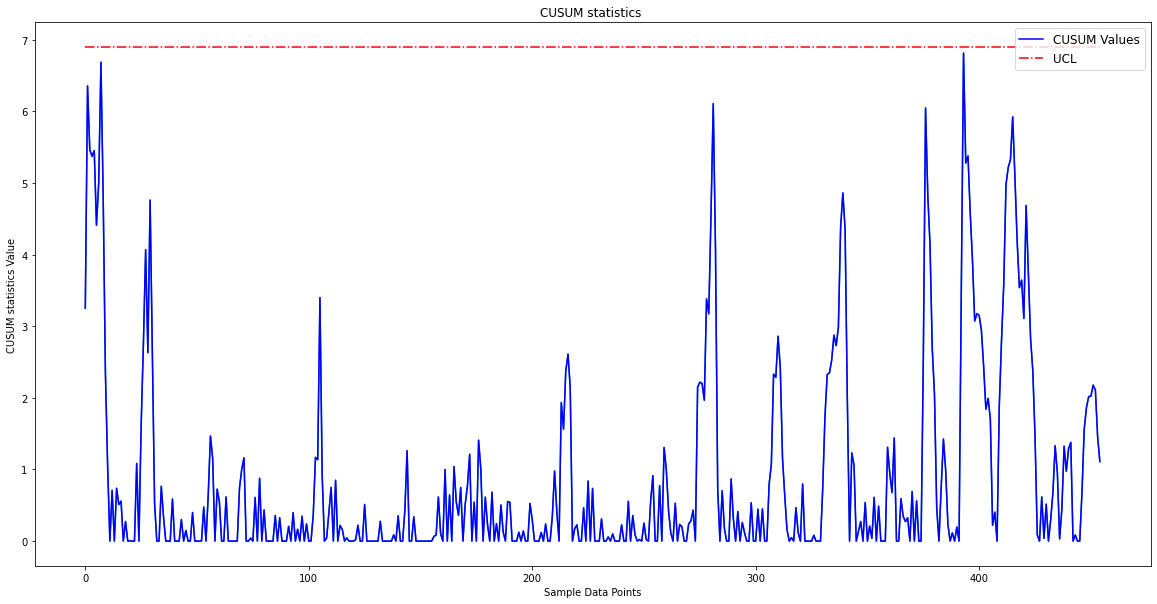

In [2551]:
plot_try_cusum(MC5[1:],UCL_cusum)

In [2552]:
MC=MC5[1:]
MC=np.array(MC)
t=[i for i, v in enumerate(MC) if v> UCL_cusum]
print(len(t))

0


In [2553]:
X3=array_reduce(X2,t)
len(X3)

455

In [2554]:
m_c,p_c = X3.shape
MC6=[0]*(m_c+1)
N=[1]*(m_c+1)
print(m_c)
cp=np.zeros([m_c, 4])


for i in range(1,m_c+1):
    if i==1:
        N[i]=1
    else:
        if MC6[i-1] > 0:
            N[i]=N[i-1]+1
        else:
            N[i]=1
    j=i-N[i]+1
    cp=c_calculate_2(X3,i,j)
    S_cu=np.cov(X3,rowvar=False)
    S_cu_inv=np.linalg.inv(S_cu)
    calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
    MC6[i]= max(0,calc-k*N[i])

455


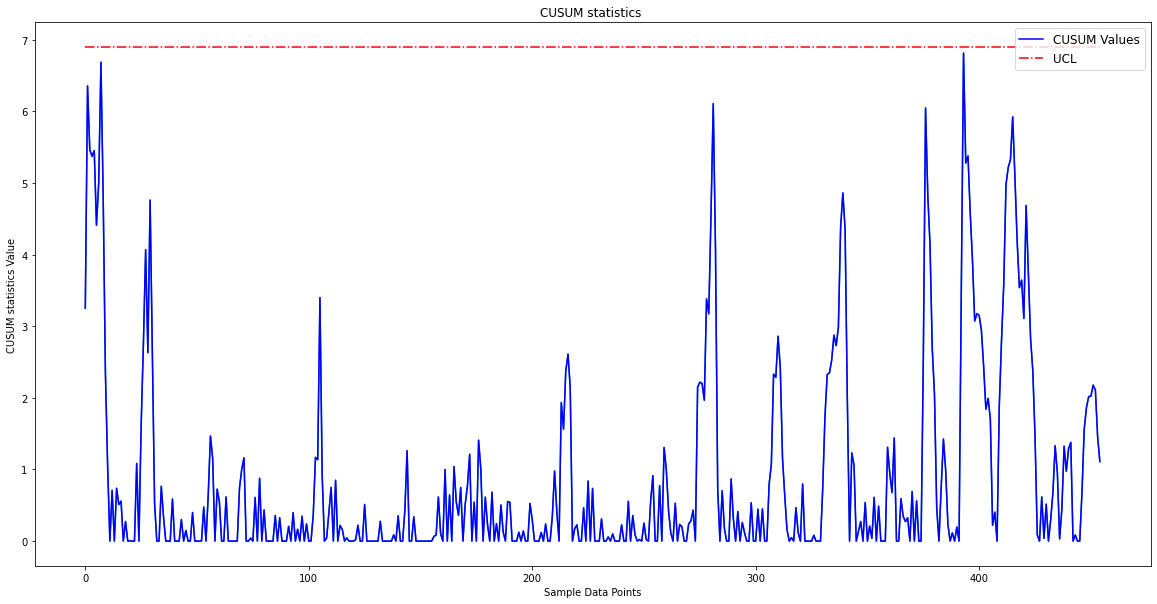

In [2555]:
plot_try_cusum(MC6[1:],UCL_cusum)

In [2556]:
MC=MC6[1:]
MC=np.array(MC)
t=[i for i, v in enumerate(MC) if v> UCL_cusum]
print(len(t))

0


In [2557]:
X4=array_reduce(X3,t)
len(X4)

455

In [2558]:
m_c,p_c = X4.shape
MC7=[0]*(m_c+1)
N=[1]*(m_c+1)
print(m_c)
cp=np.zeros([m_c, 4])


for i in range(1,m_c+1):
    if i==1:
        N[i]=1
    else:
        if MC7[i-1] > 0:
            N[i]=N[i-1]+1
        else:
            N[i]=1
    j=i-N[i]+1
    cp=c_calculate_2(X4,i,j)
    S_cu=np.cov(X4,rowvar=False)
    S_cu_inv=np.linalg.inv(S_cu)
    calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
    MC7[i]= max(0,calc-k*N[i])

455


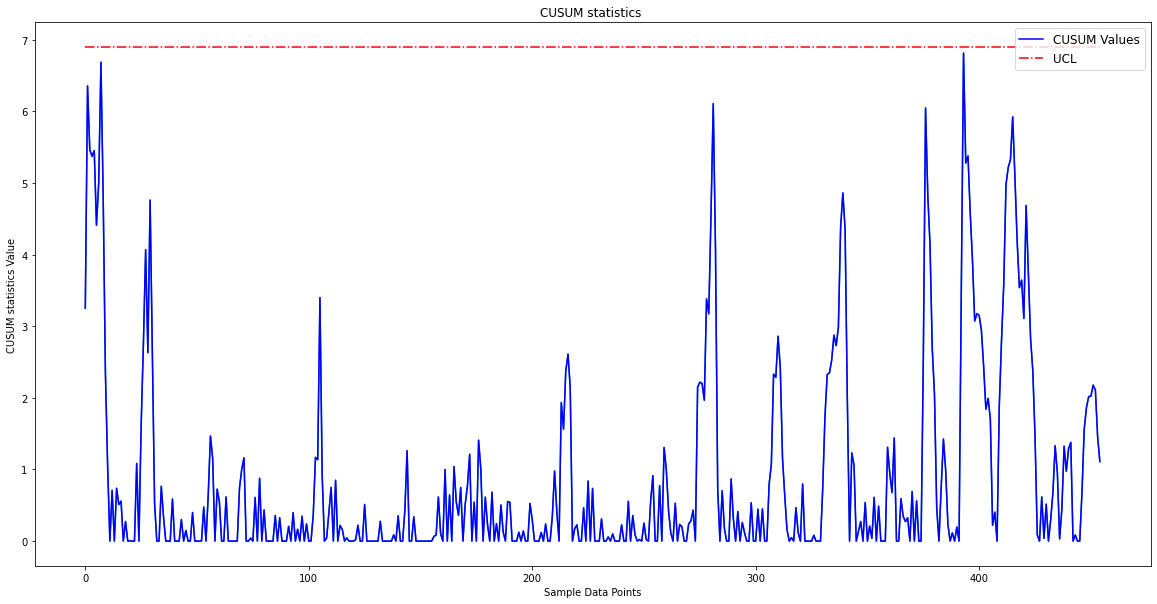

In [2559]:
plot_try_cusum(MC7[1:],UCL_cusum)

In [2560]:
########################################################################################################

In [2561]:
##################### Applying T^2 again ####################
X_new_2= X4
len(X_new_2)


455

In [2562]:
m_t,_=X_new_2.shape
t_new_2=T_2_calc(X_new_2,m_t)
print(len(t_new_2))

455


In [2563]:
t_new_2_f=[]
for i in range(len(t_new_2)):
    t_new_2_f.append((t_new_2[i][0][0]))

In [2564]:
len(t_new_2_f)

455

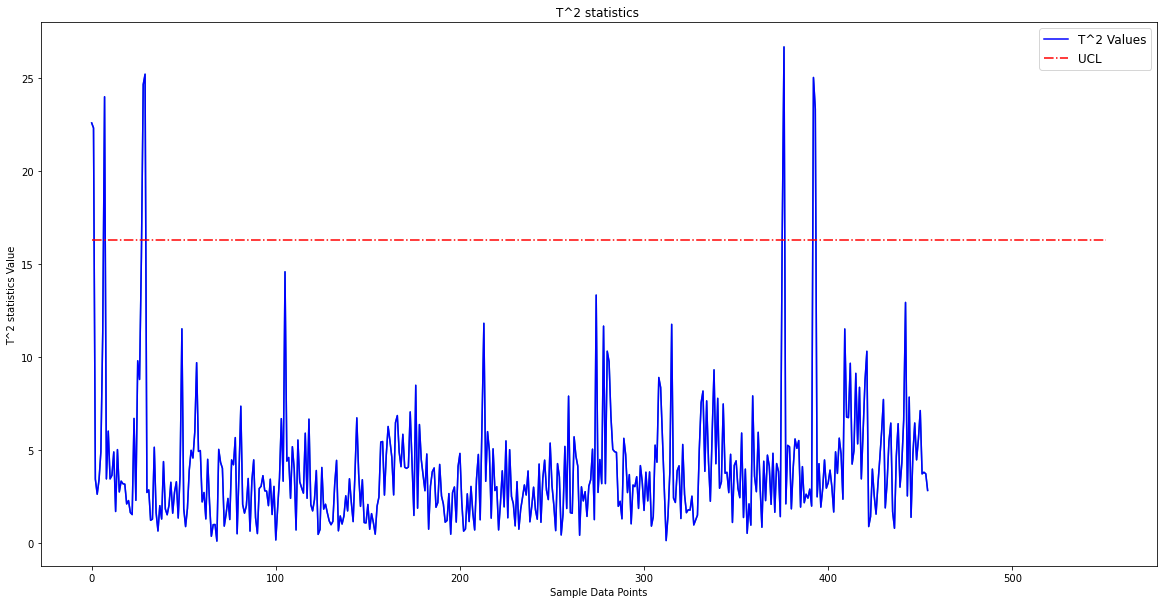

In [2565]:
plot_try(t_new_2_f,UCL)

In [2566]:
T_track=[i for i,v in enumerate(t_new_2_f) if v>UCL]
len(T_track)

8

In [2567]:
#################### T_2_ AGAIN ########################
X_new_3 = array_reduce(X_new_2,T_track)
len(X_new_3)
X_new_3.shape

(447, 4)

In [2568]:
m_t_3,_=X_new_3.shape
xp_t_3=T_2_calc(X_new_3,m_t_3)
print(len(xp_t_3))
xp_t_3_new=[]
for i in range(len(xp_t_3)):
    xp_t_3_new.append((xp_t_3[i][0][0]))


447


In [2569]:
len(xp_t_3)

447

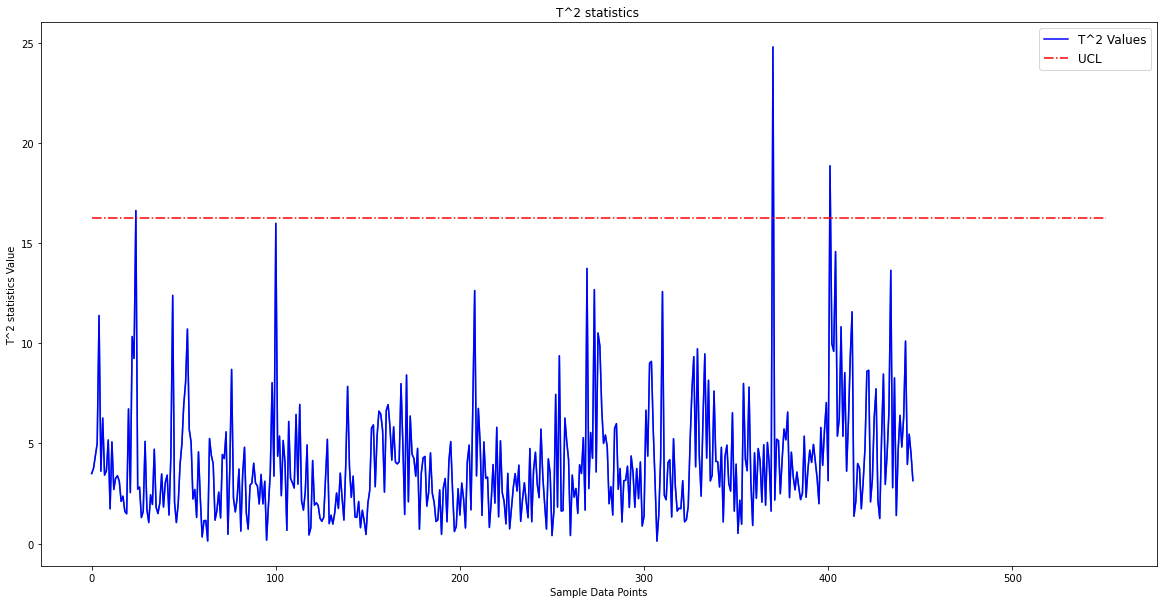

In [2570]:
plot_try(xp_t_3_new,UCL)

In [2571]:
T_T_4=[i for i,v in enumerate(xp_t_3_new) if v>UCL]
len(T_T_4)

3

In [2572]:
X_new_4 = array_reduce(X_new_3,T_T_4)
len(X_new_4)
X_new_4.shape

(444, 4)

In [2573]:
m_t_4,_=X_new_4.shape
xp_t_4=T_2_calc(X_new_4,m_t_4)
print(len(xp_t_4))
xp_t_4_new=[]
for i in range(len(xp_t_4)):
    xp_t_4_new.append((xp_t_4[i][0][0]))

444


In [2630]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

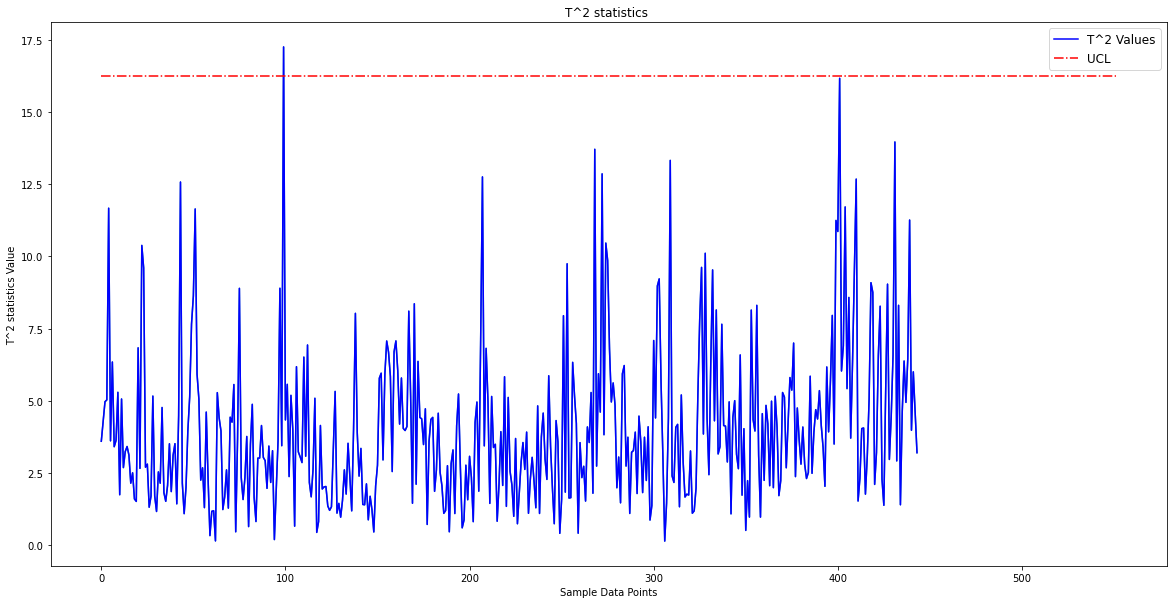

In [2631]:
plot_try(xp_t_4_new,UCL)

In [2575]:
T_T_5=[i for i,v in enumerate(xp_t_4_new) if v>UCL]
len(T_T_5)

1

In [2576]:
X_new_5 = array_reduce(X_new_4,T_T_5)
len(X_new_5)
X_new_5.shape

(443, 4)

In [2577]:
m_t_5,_=X_new_5.shape
xp_t_5=T_2_calc(X_new_5,m_t_5)
print(len(xp_t_5))
xp_t_5_new=[]
for i in range(len(xp_t_5)):
    xp_t_5_new.append((xp_t_5[i][0][0]))

443


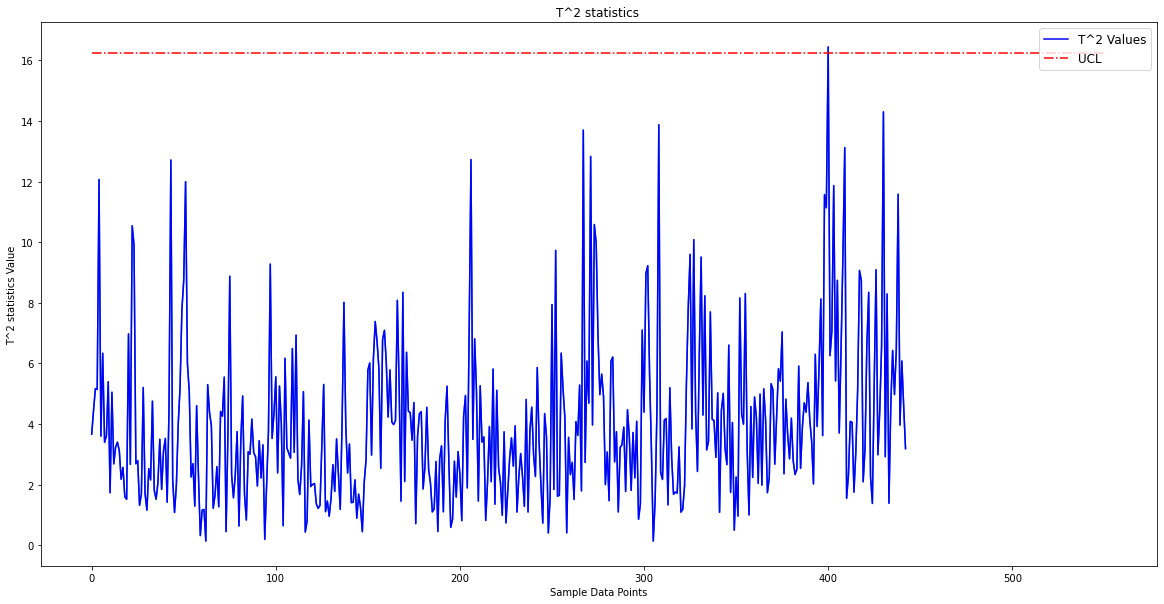

In [2578]:
plot_try(xp_t_5_new,UCL)

In [2579]:
T_T_6=[i for i,v in enumerate(xp_t_5_new) if v>UCL]
len(T_T_6)

1

In [2580]:
X_new_6 = array_reduce(X_new_5,T_T_6)
len(X_new_6)
X_new_6.shape

(442, 4)

In [2581]:
m_t_6,_=X_new_6.shape
xp_t_6=T_2_calc(X_new_6,m_t_5)
print(len(xp_t_6))
xp_t_6_new=[]
for i in range(len(xp_t_6)):
    xp_t_6_new.append((xp_t_6[i][0][0]))

442


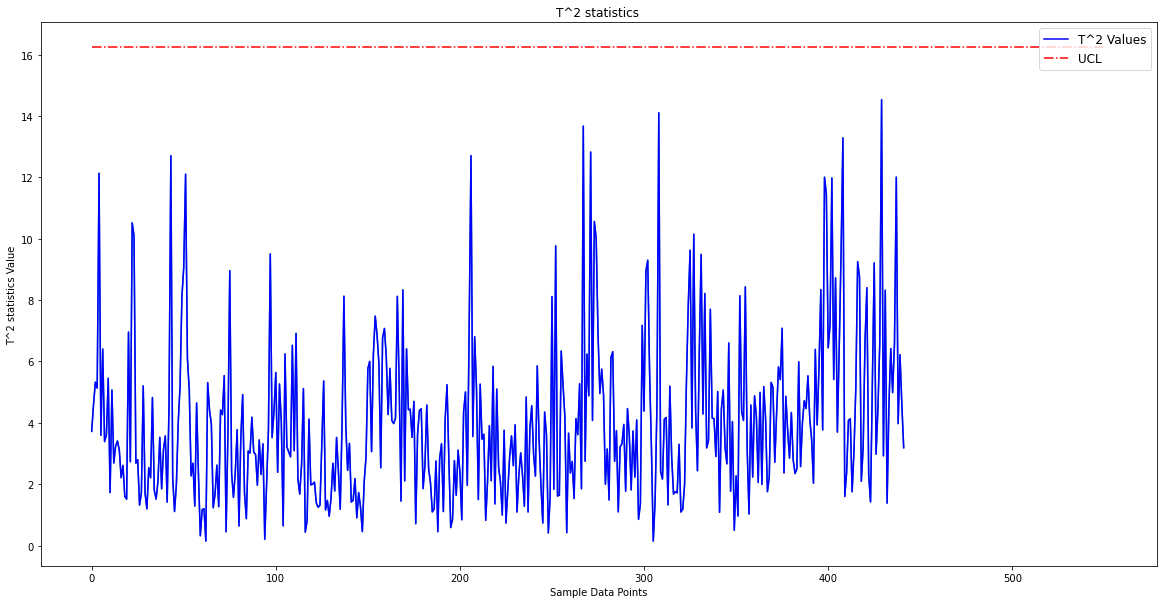

In [2582]:
plot_try(xp_t_6_new,UCL)

In [2413]:
# AGAIN CUSUM

In [2583]:
X_c_1 =X_new_6

In [2584]:
m_c,p_c = X_c_1.shape
MC8=[0]*(m_c+1)
N=[1]*(m_c+1)
print(m_c)
cp=np.zeros([m_c, 4])


for i in range(1,m_c+1):
    if i==1:
        N[i]=1
    else:
        if MC8[i-1] > 0:
            N[i]=N[i-1]+1
        else:
            N[i]=1
    j=i-N[i]+1
    cp=c_calculate_2(X_c_1,i,j)
    S_cu=np.cov(X_c_1,rowvar=False)
    S_cu_inv=np.linalg.inv(S_cu)
    calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
    MC8[i]= max(0,calc-k*N[i])

442


In [2585]:
len(MC8)

443

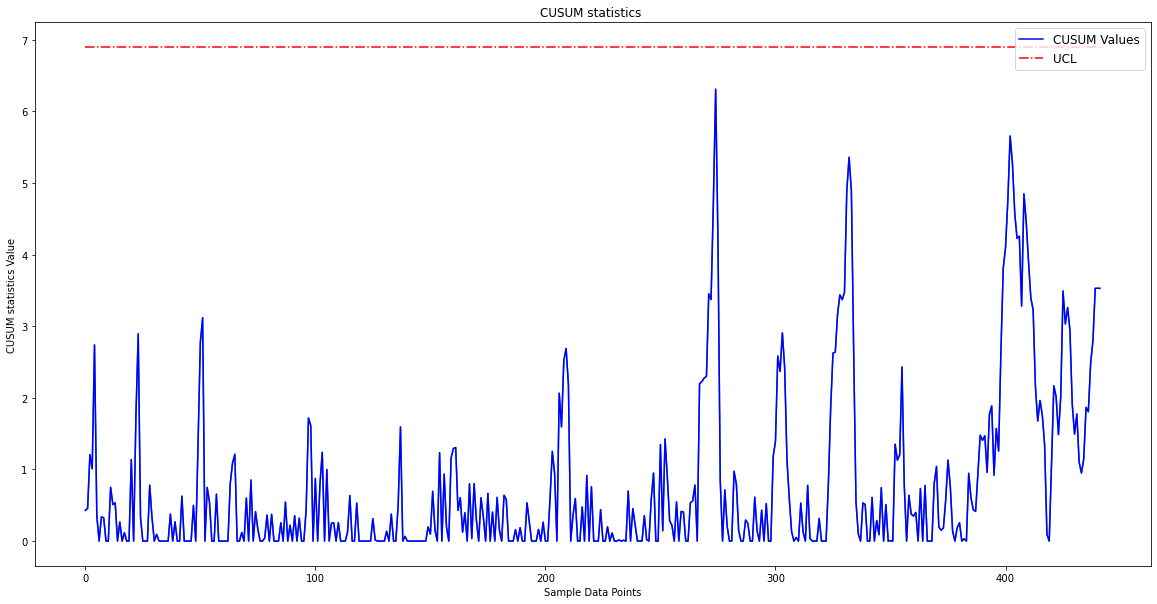

In [2586]:
plot_try_cusum(MC8[1:],UCL_cusum)

In [2589]:
def c_calculate_2(X,i,j):
    mean_cusum = np.mean(X,axis = 0)
    mean_cusum_arr = X-[mean_cusum]*len(X)
    c=np.array([0]*4)
    for p in range(j-1,i):
        c=c+(mean_cusum_arr[p])
    return c

def plotcusum(t_stat,UCL):
    plt.plot(t_stat)
    plt.plot(t_stat,color='b',label='CUSUM Values')
    plt.legend(fontsize=12,loc = 'upper right')
    plt.title("CUSUM statistics ")
    plt.xlabel('Sample Data Points')
    plt.ylabel('CUSUM statistics Value')
    ucl_ar = UCL
    Ucl_limit=np.repeat(UCL,len(t_stat))
    plt.plot(Ucl_limit,'r-.',label='UCL')
    plt.legend(fontsize=12,loc = 'upper right')


def CUSUM_stats(data,ooc=[]):
    UCL = 0.684211*4 + 4.162281
    k=1.5
    data = array_reduce(data,ooc)
    m,_ = data.shape
    MC=[0]*(m+1)
    N=[1]*(m+1)
    #print(m)
    cp=np.zeros([m, 4])
    
    for i in range(1,m+1):
        if i==1:
            N[i]=1
        else:
            if MC[i-1] > 0:
                N[i]=N[i-1]+1
            else:
                N[i]=1
        j=i-N[i]+1
        cp=c_calculate_2(data,i,j)
        S_cu=np.cov(data,rowvar=False)
        S_cu_inv=np.linalg.inv(S_cu)
        calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
        MC[i]= max(0,calc-k*N[i])
    ooc = [MC[1:] for i,v in enumerate(MC[1:]) if v > UCL]
    #figure(figsize=(20, 10), dpi=80)
    plt.rcParams["figure.figsize"] = (20,10)
    plotcusum(MC[1:],UCL)
    return data, ooc

(array([[-6584.30600586,  -249.14470959,  -605.69781368,   114.60762067],
        [-6518.74956682,  -273.63494672,  -655.93854513,    91.6922738 ],
        [-6548.05350643,  -285.03129976,  -636.166429  ,    92.72448258],
        ...,
        [-6450.60374432,  -259.57351091,  -690.06584599,    88.26255052],
        [-6349.72155057,  -214.83406132,  -689.45913914,    97.95872982],
        [-6386.26888554,  -212.15873456,  -690.56684841,    89.11237699]]),
 [])

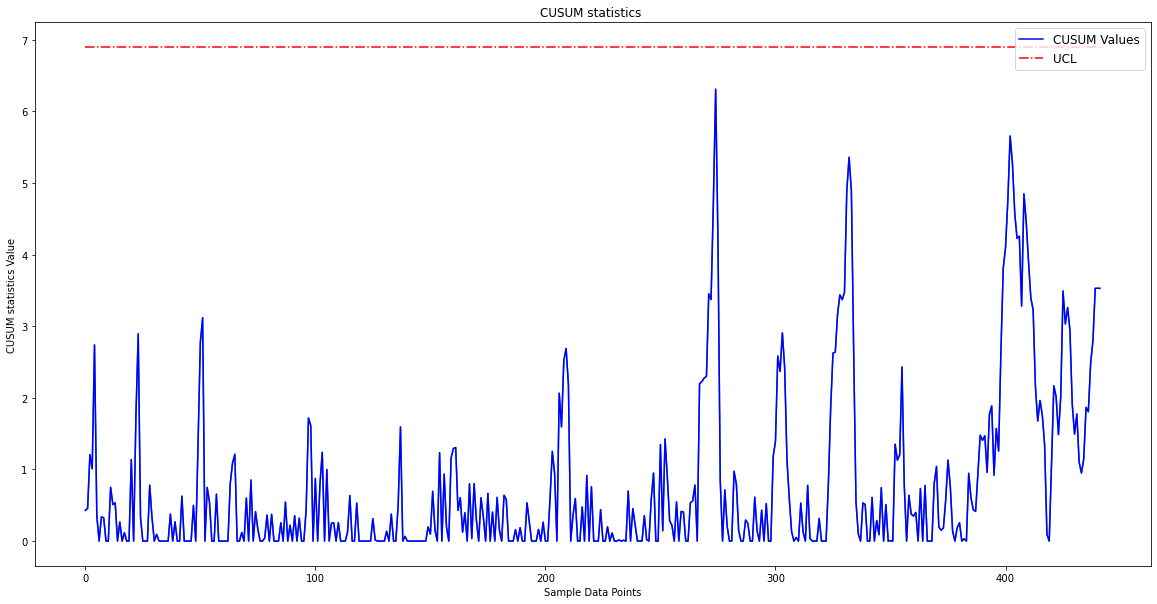

In [2590]:
CUSUM_stats(X_new_6,)

In [2233]:
T_C_TRACK=[i for i, v in enumerate(MC_2) if v>UCL_cusum]
len(T_C_TRACK)

137

In [1049]:
################################################
################################################
################################################

In [1145]:
UCL_cusum

6.000299999999999

In [1146]:
MC=MC2[1:]
MC=np.array(MC)


In [1147]:
def c_calculate_2(X,i,j):
    mean_cusum_l=np.mean(X,axis=0)
    mean_cusum_arr = X-[mean_cusum_l]*len(X)
    c=np.array([0]*4)
    for p in range(j-1,i):
        c=c+(mean_cusum_arr[p])
    return c
        

In [1148]:
def plot_try_cusum(a,b):
    plt.plot(a)
    Ucl_limit=np.repeat(b,len(a))
    plt.plot(Ucl_limit)

In [1149]:
X_C=y_cusum

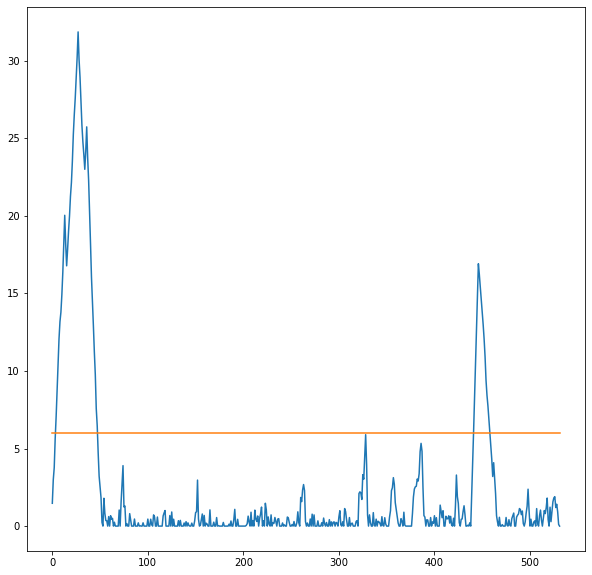

61
471
471


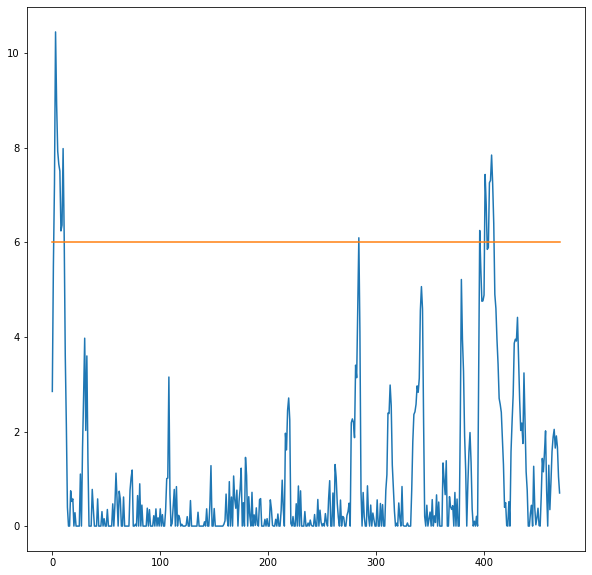

19
452
452


In [1150]:
t_track_cu=[]
while any(x > UCL_cusum for x in MC):
    #print(len(MC))
    plt.figure()
    plot_try_cusum(MC,UCL_cusum)
    plt.pause(1)
    A=[i for i, v in enumerate(MC) if v> UCL_cusum]
    print(len(A))
    t_track_cu.append(A)
    X_C=array_reduce(X_C,A)
    print(len(X_C))
    m_c,p_c = X_C.shape
    print(m_c)
    MC10=[0]*(m_c+1)
    N=[1]*(m_c+1)
    cp=np.zeros([m_c, p_c])
    
    for i in range(1,m_c+1):
        if i==1:
            N[i]=1
        else:
            if MC10[i-1] > 0:
                N[i]=N[i-1]+1
            else:
                N[i]=1
        j=i-N[i]+1
        cp=c_calculate_2(X_C,i,j)
        S_2=np.cov(X_C,rowvar=False)
        S_inv=np.linalg.inv(S_2)
        calc=(cp.transpose().dot(S_cu_inv).dot(cp))**0.5
        MC10[i]= max(0,calc-k*N[i])
    MC=MC10[1:]
    MC=np.array(MC)
    
    

In [918]:
MC

array([1.66255568e+00, 3.36393142e+00, 4.33644517e+00, 2.83320699e+00,
       1.93131702e+00, 1.53113657e+00, 1.37190340e+00, 7.28810670e-01,
       1.57335434e+00, 1.65758641e+00, 0.00000000e+00, 8.46928633e-01,
       1.13232187e+00, 7.78478766e-01, 0.00000000e+00, 0.00000000e+00,
       6.64181155e-01, 4.25649933e-01, 4.83761202e-01, 0.00000000e+00,
       2.64771349e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.03960582e+00, 0.00000000e+00, 1.48348179e+00,
       2.65752416e+00, 3.94113978e+00, 1.55157812e+00, 1.93339606e+00,
       0.00000000e+00, 1.58562642e-01, 0.00000000e+00, 0.00000000e+00,
       7.72848763e-01, 3.67738980e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.15330085e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.66399549e-01, 0.00000000e+00, 0.00000000e+00,
       3.18895460e-01, 0.00000000e+00, 2.76224950e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.54230015e-01,
      

In [815]:
MC=np.array(MC)
t=[i for i, v in enumerate(MC) if v> UCL_cusum]
len(t)

0

In [646]:
len(t_track_cu[0])

61

In [607]:
len(MC)

470

In [3]:
# calculations

In [2615]:
1-4*0.0027*(1-0.0027)**3-(1-0.0027)**4

4.358269543247584e-05

In [2611]:
4*0.0027*(1-0.0027)**3+(1-0.0027)**4

0.9999564173045675

In [2598]:
a=0.002
((a*(1-a))**2)*6+4*(a**3)*(1-a)+a**4

2.3936048e-05

In [2599]:
(1-(1-a)**4)

0.007976031983999987

In [2613]:
4*(a**3)+3*(a**4)

3.2048000000000003e-08

In [2614]:
a**4

1.6000000000000003e-11

In [2616]:
1-(0.0108/2)

0.9946

In [2617]:
4*0.0027


0.0108

In [2618]:
1-(0.0108/2)

0.9946

In [2620]:
1/(1-0.70884)

3.4345377112240696

In [2621]:
1/(1-0.98124)

53.30490405117271

In [2622]:
1/4.358269543247584e-05

22944.88649857222

In [2623]:
1/0.0108

92.59259259259258

In [2624]:
22950/370

62.027027027027025